In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.sparse as sparse
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('df_final.csv', encoding='utf-8', index_col=0)

In [3]:
df

,persee:dateOfPrintPublication{Literal}(xsd:gYear),marcrel:aut{URIRef}[0],marcrel:aut{URIRef}[1],marcrel:aut{URIRef}[2],marcrel:aut{URIRef}[3],marcrel:aut{URIRef}[4],marcrel:aut{URIRef}[5],marcrel:aut{URIRef}[6],marcrel:aut{URIRef}[7],dcterms:title{Literal},bibo:numPages{Literal},dcterms:abstract{Literal}@fr,marcrel:aut{URIRef}[8],marcrel:aut{URIRef}[9],marcrel:aut{URIRef}[10],dcterms:title{Literal}[0],nombre_auteurs
dcterms:identifier{Literal},,,,,,,,,,,,,,,,,
https://www.persee.fr/doc/ahess_0395-2649_1971_num_26_2_422360,1971,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Les sociétés imaginées : monachisme et utopie,27.0,NaN,NaN,NaN,NaN,NaN,1
https://www.persee.fr/doc/ahess_0395-2649_1973_num_28_5_293413_t1_1157_0000_3,1973,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jacques Maître, Sociologie religieuse et métho...",2.0,NaN,NaN,NaN,NaN,NaN,1
https://www.persee.fr/doc/ahess_0395-2649_1974_num_29_5_293553,1974,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Du cultuel au culturel,11.0,NaN,NaN,NaN,NaN,NaN,1
https://www.persee.fr/doc/ahess_0395-2649_1995_num_50_4_279407,1995,http://data.persee.fr/authority/247067#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Les prémices de la mécanisation agricole entre...,32.0,NaN,NaN,NaN,NaN,NaN,1
https://www.persee.fr/doc/antiq_0770-2817_1970_num_39_1_1587_t1_0320_0000_2,1970,http://data.persee.fr/authority/246578#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,"Gilbert Charles-Picard, L'archéologie, découve...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.persee.fr/doc/syria_0039-7946_1970_num_47_1_8522,1970,http://data.persee.fr/authority/256018#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie.,8.0,NaN,NaN,NaN,NaN,NaN,2
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_1_8531,1972,http://data.persee.fr/authority/211732#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie,6.0,NaN,NaN,NaN,NaN,NaN,2
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_3_8534,1972,http://data.persee.fr/authority/237581#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie,4.0,NaN,NaN,NaN,NaN,NaN,2


# pretraitement

In [4]:
colonnes_vides = df.columns[df.isna().all()]
print("Colonnes vides :", colonnes_vides)

Colonnes vides : Index([], dtype='object')


In [5]:
aut = [col for col in df.columns if col.startswith('marcrel:aut{URIRef}')]
print(f"Nombre de colonnes 'aut' dans df_final: {len(aut)}")

Nombre de colonnes 'aut' dans df_final: 11


In [6]:
# Fusionner toutes les colonnes d'auteurs en une seule Series
auteurs = pd.Series(dtype='object')
for col in df.columns:
    if 'marcrel:aut{URIRef}' in col:
        auteurs = auteurs.append(df[col].dropna(), ignore_index=True)

# Compter le nombre total d'auteurs uniques
nombre_auteurs_uniques = auteurs.nunique()
print(f"Nombre total d'auteurs uniques : {nombre_auteurs_uniques}")

Nombre total d'auteurs uniques : 278


C:\Users\Lama\AppData\Local\Temp\ipykernel_17644\2484717545.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  auteurs = auteurs.append(df[col].dropna(), ignore_index=True)


# creer les graphes:

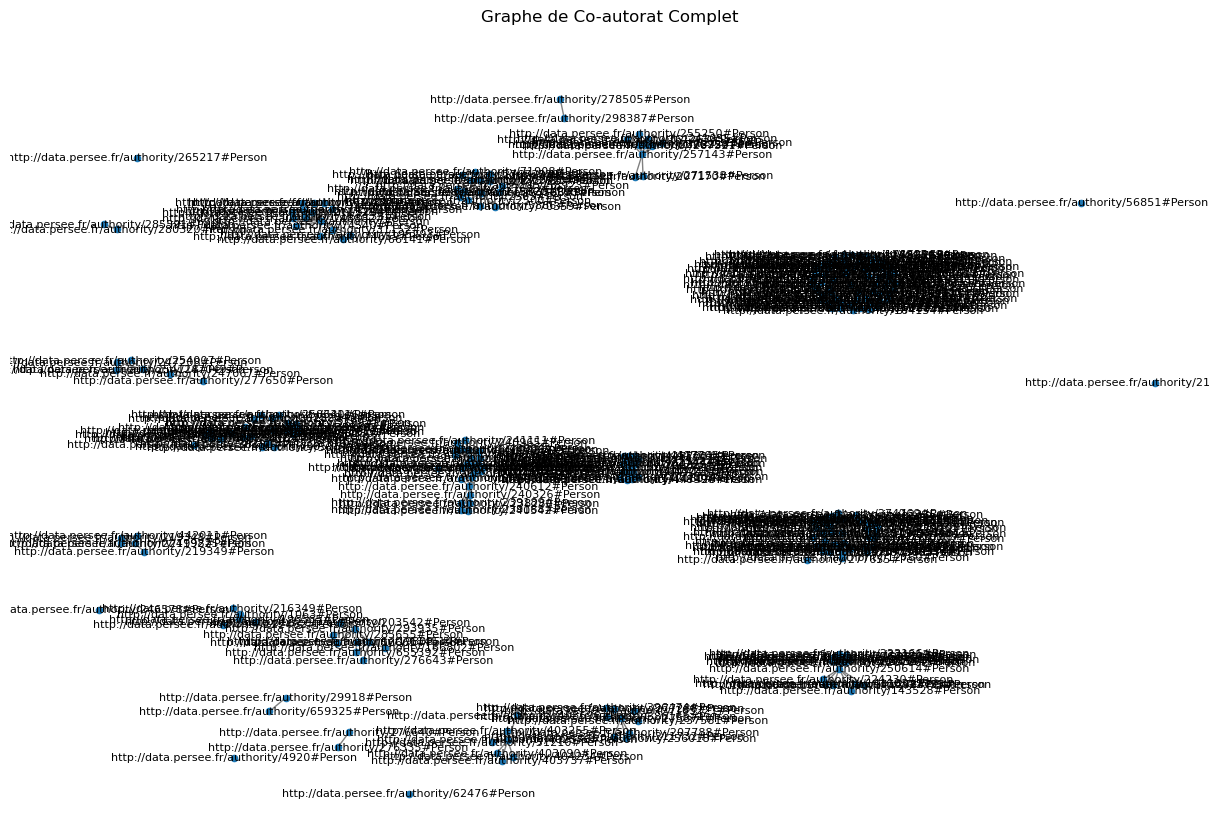

In [7]:
G = nx.Graph()

for index, row in df.iterrows():
    auteurs = []
    
    # Collecte des identifiants d'auteurs pour chaque document
    for i in range(len(aut)+1):  
        column_name = f'marcrel:aut{{URIRef}}[{i}]'  
        if column_name in df.columns and pd.notnull(row[column_name]):
            auteur_uri = row[column_name]
            auteurs.append(auteur_uri)
            if auteur_uri not in G:
                G.add_node(auteur_uri)
    
    # Ajout des arêtes pour chaque paire d'auteurs
    for i in range(len(auteurs)):
        for j in range(i + 1, len(auteurs)):
            G.add_edge(auteurs[i], auteurs[j])


            
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=20, font_size=8, edge_color='gray')
plt.title("Graphe de Co-autorat Complet")
plt.show()


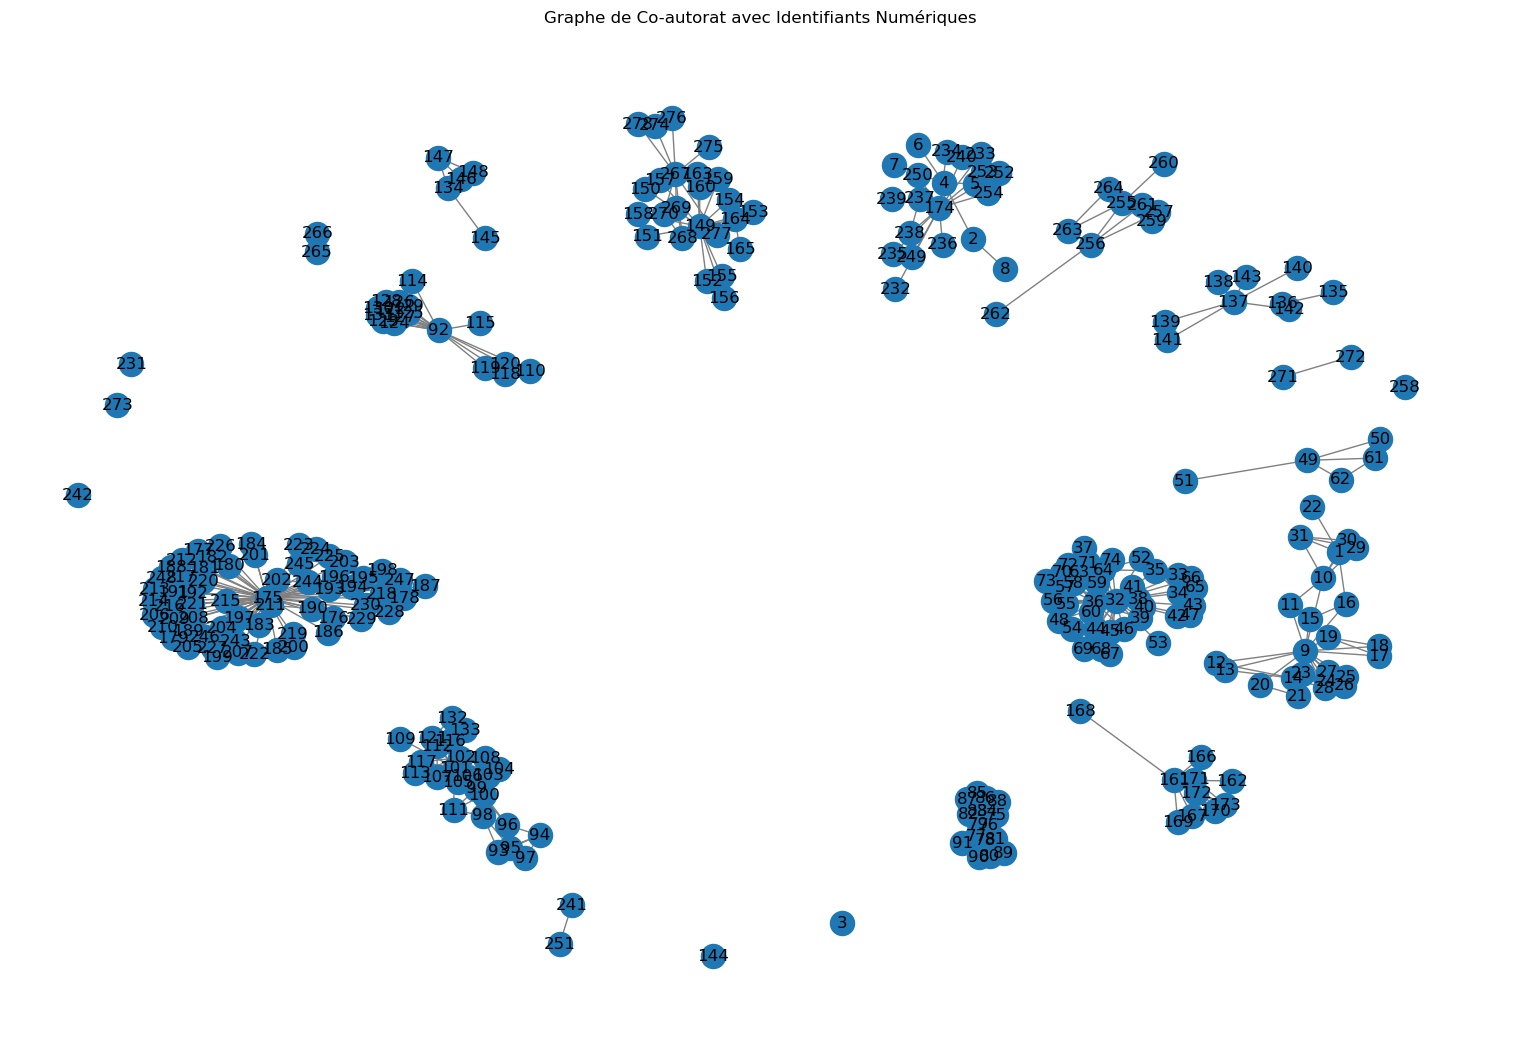

In [8]:
#utilisation du chatgpt
# 1. Créez le mapping d'URI à identifiants numériques
auteur_id_map = {}
current_id = 1

# Pour créer le mapping, parcourez chaque colonne 'marcrel:aut' de chaque ligne
for index, row in df.iterrows():
    for i in range(df.shape[1]): 
        column_name = f'marcrel:aut{{URIRef}}[{i}]' 
        if column_name in df.columns:
            auteur_uri = row[column_name]
            if pd.notnull(auteur_uri) and auteur_uri not in auteur_id_map:
                auteur_id_map[auteur_uri] = current_id
                current_id += 1

G = nx.Graph()

for index, row in df.iterrows():
    auteurs_ids = []
    for i in range(df.shape[1]):  
        column_name = f'marcrel:aut{{URIRef}}[{i}]'  
        if column_name in df.columns:
            auteur_uri = row[column_name]
            if pd.notnull(auteur_uri):
                auteur_id = auteur_id_map[auteur_uri]
                auteurs_ids.append(auteur_id)
                G.add_node(auteur_id)  # Ajoutez le nœud ici
    
    # Ajoutez des arêtes pour chaque paire d'auteurs
    for i in range(len(auteurs_ids)):
        for j in range(i + 1, len(auteurs_ids)):
            G.add_edge(auteurs_ids[i], auteurs_ids[j])

pos = nx.spring_layout(G, k=0.15, iterations=70) 

plt.figure(figsize=(15, 10))  
nx.draw(G, pos, with_labels=True, node_size=300, font_size=12, edge_color='grey')
plt.title("Graphe de Co-autorat avec Identifiants Numériques")
plt.show()


# informations  et statistiques sur notre graph:

In [9]:
# Afficher la liste des paires de nœuds (auteurs) qui ont une arête entre eux
for (n1, n2) in G.edges():
    print(f"Auteur {n1} a collaboré avec Auteur {n2}")


Auteur 1 a collaboré avec Auteur 16
Auteur 1 a collaboré avec Auteur 22
Auteur 1 a collaboré avec Auteur 29
Auteur 1 a collaboré avec Auteur 30
Auteur 1 a collaboré avec Auteur 10
Auteur 1 a collaboré avec Auteur 31
Auteur 2 a collaboré avec Auteur 4
Auteur 2 a collaboré avec Auteur 8
Auteur 4 a collaboré avec Auteur 5
Auteur 4 a collaboré avec Auteur 6
Auteur 4 a collaboré avec Auteur 7
Auteur 9 a collaboré avec Auteur 10
Auteur 9 a collaboré avec Auteur 11
Auteur 9 a collaboré avec Auteur 12
Auteur 9 a collaboré avec Auteur 13
Auteur 9 a collaboré avec Auteur 14
Auteur 9 a collaboré avec Auteur 15
Auteur 9 a collaboré avec Auteur 16
Auteur 9 a collaboré avec Auteur 17
Auteur 9 a collaboré avec Auteur 18
Auteur 9 a collaboré avec Auteur 19
Auteur 9 a collaboré avec Auteur 20
Auteur 9 a collaboré avec Auteur 21
Auteur 9 a collaboré avec Auteur 23
Auteur 9 a collaboré avec Auteur 24
Auteur 9 a collaboré avec Auteur 25
Auteur 9 a collaboré avec Auteur 26
Auteur 9 a collaboré avec Auteur 

In [10]:
id_auteur_map = {v: k for k, v in auteur_id_map.items()}

# Afficher la liste des paires de nœuds (auteurs) avec leurs URIs
for (n1, n2) in G.edges():
    print(f"Auteur URI {id_auteur_map[n1]} a collaboré avec Auteur URI {id_auteur_map[n2]}")


Auteur URI http://data.persee.fr/authority/58528#Person a collaboré avec Auteur URI http://data.persee.fr/authority/33288#Person
Auteur URI http://data.persee.fr/authority/58528#Person a collaboré avec Auteur URI http://data.persee.fr/authority/38150#Person
Auteur URI http://data.persee.fr/authority/58528#Person a collaboré avec Auteur URI http://data.persee.fr/authority/212089#Person
Auteur URI http://data.persee.fr/authority/58528#Person a collaboré avec Auteur URI http://data.persee.fr/authority/255621#Person
Auteur URI http://data.persee.fr/authority/58528#Person a collaboré avec Auteur URI http://data.persee.fr/authority/33074#Person
Auteur URI http://data.persee.fr/authority/58528#Person a collaboré avec Auteur URI http://data.persee.fr/authority/35416#Person
Auteur URI http://data.persee.fr/authority/247067#Person a collaboré avec Auteur URI http://data.persee.fr/authority/247049#Person
Auteur URI http://data.persee.fr/authority/247067#Person a collaboré avec Auteur URI http://d

In [11]:
# Pour obtenir le nombre de nœuds :
nombre_de_noeuds = G.number_of_nodes()

# Pour obtenir le nombre d'arêtes :
nombre_d_aretes = G.number_of_edges()

print("Nombre de nœuds :", nombre_de_noeuds)
print("Nombre d'arêtes :", nombre_d_aretes)


Nombre de nœuds : 278
Nombre d'arêtes : 595


In [12]:
list(G.adj[1])


[16, 22, 29, 30, 10, 31]

In [13]:
G.degree()


DegreeView({1: 6, 2: 2, 3: 0, 4: 4, 5: 1, 6: 1, 7: 1, 8: 1, 9: 18, 10: 6, 11: 2, 12: 3, 13: 3, 14: 9, 15: 2, 16: 3, 17: 3, 18: 3, 19: 3, 20: 2, 21: 2, 22: 1, 23: 7, 24: 7, 25: 7, 26: 7, 27: 7, 28: 7, 29: 4, 30: 4, 31: 4, 32: 36, 33: 5, 34: 8, 35: 5, 36: 17, 37: 1, 38: 5, 39: 4, 40: 5, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 2, 49: 4, 50: 1, 51: 1, 52: 3, 53: 1, 54: 2, 55: 5, 56: 5, 57: 9, 58: 12, 59: 7, 60: 3, 61: 2, 62: 2, 63: 10, 64: 8, 65: 4, 66: 4, 67: 3, 68: 3, 69: 3, 70: 8, 71: 6, 72: 6, 73: 4, 74: 4, 75: 12, 76: 16, 77: 12, 78: 12, 79: 16, 80: 8, 81: 12, 82: 12, 83: 12, 84: 12, 85: 9, 86: 9, 87: 9, 88: 9, 89: 7, 90: 7, 91: 6, 92: 16, 93: 5, 94: 4, 95: 5, 96: 7, 97: 4, 98: 7, 99: 12, 100: 8, 101: 17, 102: 16, 103: 6, 104: 5, 105: 7, 106: 6, 107: 7, 108: 5, 109: 1, 110: 1, 111: 4, 112: 9, 113: 4, 114: 1, 115: 1, 116: 7, 117: 5, 118: 3, 119: 3, 120: 3, 121: 6, 122: 10, 123: 10, 124: 10, 125: 10, 126: 10, 127: 10, 128: 10, 129: 10, 130: 10, 131: 10, 132: 5, 133: 4, 134:

In [14]:
G.adj

AdjacencyView({1: {16: {}, 22: {}, 29: {}, 30: {}, 10: {}, 31: {}}, 2: {4: {}, 8: {}}, 3: {}, 4: {2: {}, 5: {}, 6: {}, 7: {}}, 5: {4: {}}, 6: {4: {}}, 7: {4: {}}, 8: {2: {}}, 9: {10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}}, 10: {9: {}, 11: {}, 29: {}, 30: {}, 31: {}, 1: {}}, 11: {10: {}, 9: {}}, 12: {9: {}, 13: {}, 14: {}}, 13: {12: {}, 9: {}, 14: {}}, 14: {12: {}, 9: {}, 13: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}}, 15: {9: {}, 16: {}}, 16: {15: {}, 9: {}, 1: {}}, 17: {9: {}, 18: {}, 19: {}}, 18: {17: {}, 9: {}, 19: {}}, 19: {17: {}, 9: {}, 18: {}}, 20: {9: {}, 21: {}}, 21: {20: {}, 9: {}}, 22: {1: {}}, 23: {24: {}, 9: {}, 25: {}, 14: {}, 26: {}, 27: {}, 28: {}}, 24: {23: {}, 9: {}, 25: {}, 14: {}, 26: {}, 27: {}, 28: {}}, 25: {23: {}, 24: {}, 9: {}, 14: {}, 26: {}, 27: {}, 28: {}}, 26: {23: {}, 24: {}, 9: {}, 25: {}, 14: {}, 27: {}, 28: {}}, 27: {23: {}, 24: {}, 9: {}, 25: {

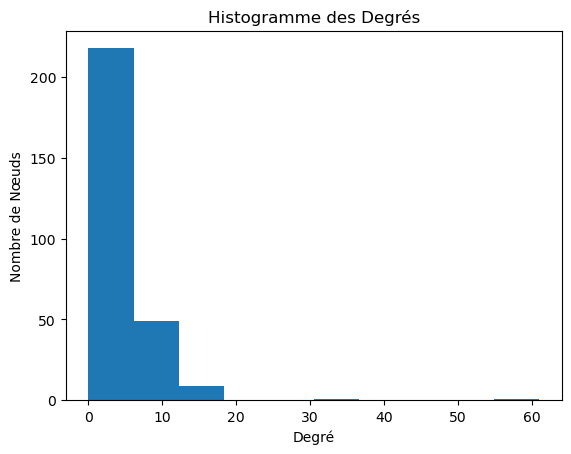

In [15]:
# Obtenir la liste de tous les degrés des nœuds dans le graphe
degrees = dict(G.degree())

# Créer l'histogramme des degrés
n, bins, patches = plt.hist(degrees.values())
plt.title('Histogramme des Degrés')
plt.xlabel('Degré')
plt.ylabel('Nombre de Nœuds')

plt.show()


In [16]:
A = nx.to_scipy_sparse_array(G)
A.todense()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

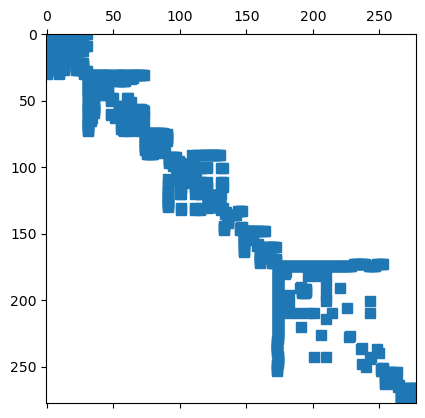

In [17]:
plt.spy(A, markersize=7)

In [18]:
A2 = A@A
A2.todense()

array([[6, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 2]], dtype=int32)

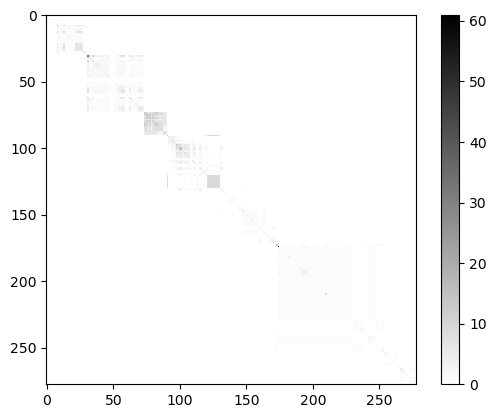

In [19]:
d = A2.todense()
plt.imshow(d,interpolation='none',cmap='binary')
plt.colorbar()

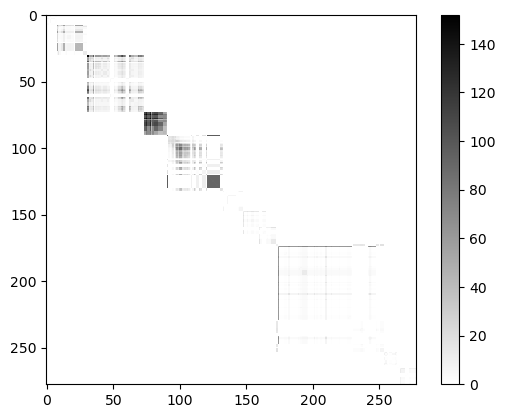

In [20]:
A3 = A@A2
d3 = A3.todense()
plt.imshow(d3,interpolation='none',cmap='binary')
plt.colorbar()

In [21]:
# Extraire la plus grande composante connexe
G_connexe = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(G_connexe).copy()

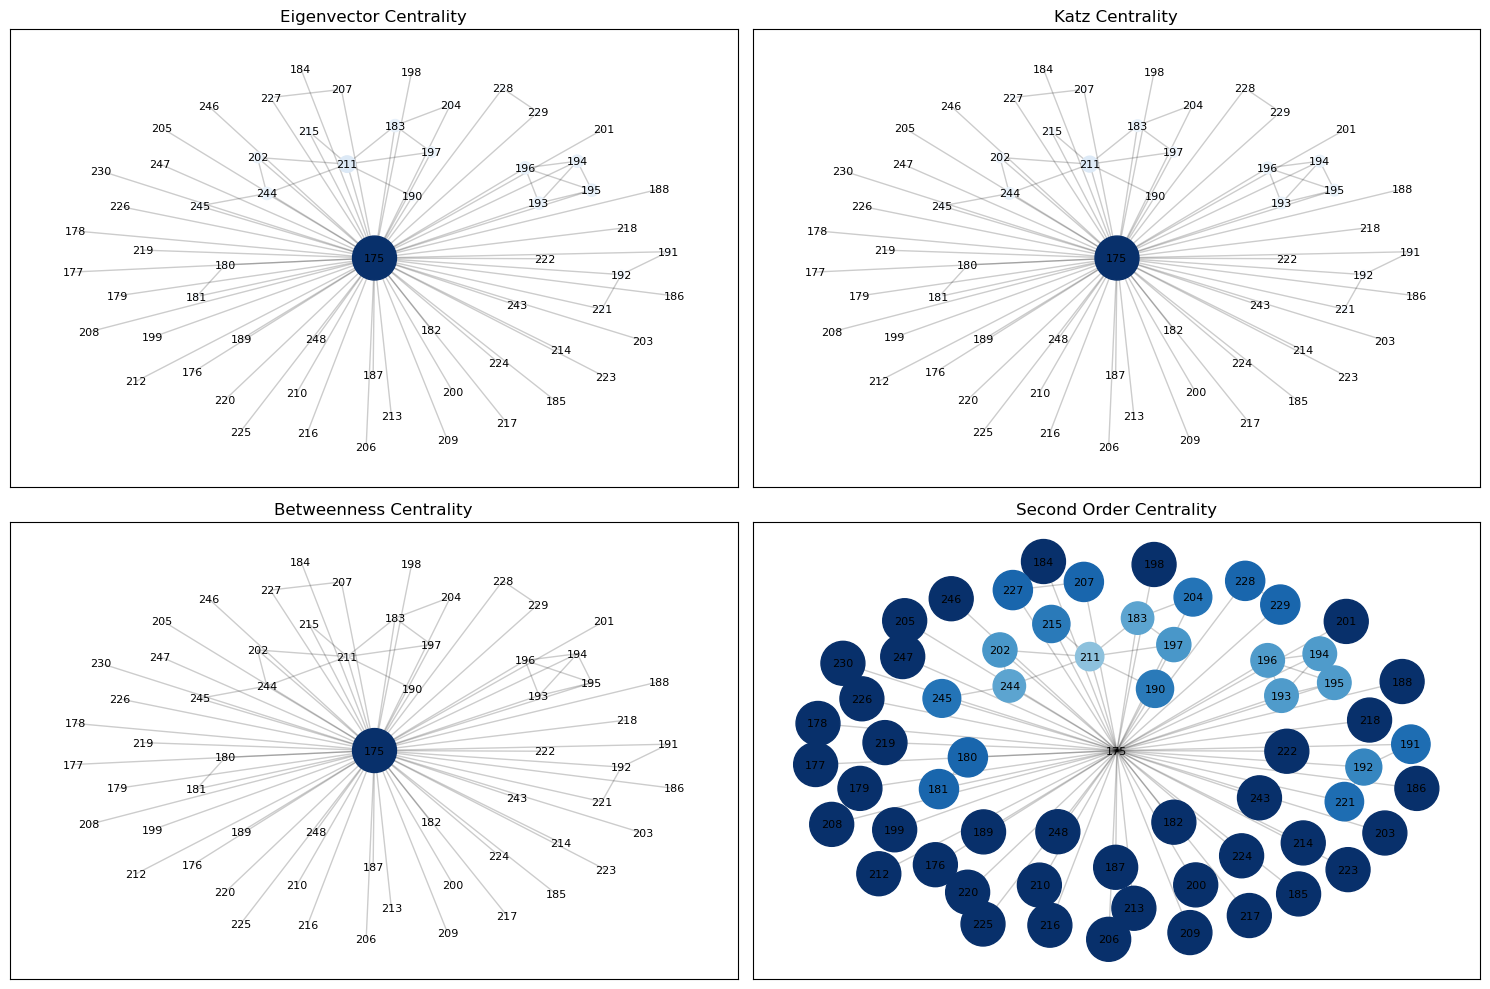

In [22]:
# Calculer les mesures de centralité pour G_sub
eigenvector_cent = nx.eigenvector_centrality(G_sub, max_iter=500)
katz_cent = nx.katz_centrality(G_sub, max_iter=500)
betweenness_cent = nx.betweenness_centrality(G_sub)
second_order_cent = nx.second_order_centrality(G_sub) 


# Créer une figure avec une grille de sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


def draw_centrality_subplot(G, pos, centrality, ax, title):
    # Transformer les valeurs de centralité en tableau numpy pour la normalisation
    values = np.array(list(centrality.values()))
    # Normaliser les valeurs de centralité entre 0 et 1 pour l'échelle des couleurs
    normalized_values = (values - min(values)) / (max(values) - min(values))
    
    # Dessiner les nœuds avec une taille proportionnelle à la centralité
    nx.draw_networkx_nodes(G, pos,
                           node_size=normalized_values * 1000,  # Taille des nœuds
                           node_color=normalized_values,  # Couleur des nœuds
                           cmap=plt.cm.Blues,
                           ax=ax)
    # Dessiner les arêtes
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)
    # Dessiner les étiquettes des nœuds
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
    # Définir le titre du sous-graphe
    ax.set_title(title)

# Position des nœuds
pos = nx.spring_layout(G_sub)

# Dessiner chaque mesure de centralité
draw_centrality_subplot(G_sub, pos, eigenvector_cent, axes[0][0], "Eigenvector Centrality")
draw_centrality_subplot(G_sub, pos, katz_cent, axes[0][1], "Katz Centrality")
draw_centrality_subplot(G_sub, pos, betweenness_cent, axes[1][0], "Betweenness Centrality")
draw_centrality_subplot(G_sub, pos, second_order_cent, axes[1][1], "Second Order Centrality")  

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()


In [23]:
# Calculer le nombre de composantes connexes
nb_composantes_connexes = nx.number_connected_components(G)

# Calculer la densité du graphe
densite = nx.density(G)

# Afficher les statistiques de base du graphe
print(f"Nombre de composantes connexes: {nb_composantes_connexes}")
print(f"Densité du graphe: {densite:.4f}")

Nombre de composantes connexes: 25
Densité du graphe: 0.0155


# creer une colonne code_categ et une colonne Nom_Complet_Categ

In [24]:
# Lire le fichier CSV en spécifiant le bon séparateur
df_categories = pd.read_csv('20240141_disciplines.csv', sep=';', encoding='utf-8')

# Vérifier les noms des colonnes
print(df_categories.columns)


Index(['collection_id', 'Discipline'], dtype='object')


In [25]:
# Création d'un dictionnaire pour mapper 'collection_id' à 'Discipline'
code_to_discipline = pd.Series(df_categories['Discipline'].values, index=df_categories['collection_id']).to_dict()

print(code_to_discipline)

{'1895': 'Histoire', 'abpo': 'Histoire', 'acsam': 'Archeologie (M.Anc.)', 'acsfo': 'Linguistique', 'acths': 'Pluri. Par essence', 'adh': 'Histoire', 'afdi': 'Science politique', 'aflin': 'Linguistique', 'agora': 'Sociologie', 'ahess': 'Sociologie', 'ahrf': 'Histoire', 'aibl': 'Etudes classiques', 'aijc': 'Droit', 'airdf': 'Science education', 'albin': 'Litterature', 'alma': 'Linguistique', 'ameri': 'Litterature', 'amime': 'Histoire', 'anami': 'Histoire', 'anata': 'Etudes classiques', 'anatm': 'Histoire', 'anatv': 'Etudes classiques', 'anisl': 'Philosophie', 'annor': 'Histoire', 'antaf': 'Histoire', 'antiq': 'Etudes classiques', 'aopo': 'Hist. sc. techniques', 'apliu': 'Science education', 'aquit': 'Histoire', 'arasi': 'Etudes g. a. cultur.', 'arch': 'Etudes g. a. cultur.', 'arcme': 'Archeologie (M.Anc.)', 'arcpa': 'Histoire', 'aremo': 'Histoire', 'argil': 'Sciences Terre', 'arnil': 'Etudes g. a. cultur.', 'arsci': 'Histoire', 'arss': 'Sociologie', 'aru': 'Sociologie', 'arzan': 'Littera

In [26]:
#distribution des types de documents:
identifiers = df.index.to_series()

# Extraire le type de document de chaque identifiant
types_docs = identifiers.str.extract(r'^([^_]+)')[0]

# Calculer la distribution des types de documents
distribution_types_docs = types_docs.value_counts()

print(distribution_types_docs)


https://www.persee.fr/doc/dhjap    5513
https://www.persee.fr/doc/bch      3033
https://www.persee.fr/doc/pharm    1985
https://www.persee.fr/doc/forem    1937
https://www.persee.fr/doc/assr     1850
https://www.persee.fr/doc/antiq    1727
https://www.persee.fr/doc/rhpr     1475
https://www.persee.fr/doc/inrp     1374
https://www.persee.fr/doc/raipr     757
https://www.persee.fr/doc/homig     710
https://www.persee.fr/doc/pop       628
https://www.persee.fr/doc/geo       580
https://www.persee.fr/doc/tiers     495
https://www.persee.fr/doc/thlou     452
https://www.persee.fr/doc/bulmo     301
https://www.persee.fr/doc/rjuiv     212
https://www.persee.fr/doc/syria     188
https://www.persee.fr/doc/hispa     168
https://www.persee.fr/doc/mcm        92
https://www.persee.fr/doc/noroi      91
https://www.persee.fr/doc/rhr        81
https://www.persee.fr/doc/rscir      52
https://www.persee.fr/doc/nda        27
https://www.persee.fr/doc/rebyz      20
https://www.persee.fr/doc/espos      11


In [27]:
df['code_categ']=df.index.to_series().str.extract(r'^https:\/\/www\.persee\.fr\/doc\/([^_\/]+)')[0]
# Créer une nouvelle colonne 'Nom_Complet_Categ' en mappant 'code_categ' aux noms complets des catégories
df['Nom_Complet_Categ'] = df['code_categ'].map(code_to_discipline)
df

,persee:dateOfPrintPublication{Literal}(xsd:gYear),marcrel:aut{URIRef}[0],marcrel:aut{URIRef}[1],marcrel:aut{URIRef}[2],marcrel:aut{URIRef}[3],marcrel:aut{URIRef}[4],marcrel:aut{URIRef}[5],marcrel:aut{URIRef}[6],marcrel:aut{URIRef}[7],dcterms:title{Literal},bibo:numPages{Literal},dcterms:abstract{Literal}@fr,marcrel:aut{URIRef}[8],marcrel:aut{URIRef}[9],marcrel:aut{URIRef}[10],dcterms:title{Literal}[0],nombre_auteurs,code_categ,Nom_Complet_Categ
dcterms:identifier{Literal},,,,,,,,,,,,,,,,,,,
https://www.persee.fr/doc/ahess_0395-2649_1971_num_26_2_422360,1971,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Les sociétés imaginées : monachisme et utopie,27.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie
https://www.persee.fr/doc/ahess_0395-2649_1973_num_28_5_293413_t1_1157_0000_3,1973,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jacques Maître, Sociologie religieuse et métho...",2.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie
https://www.persee.fr/doc/ahess_0395-2649_1974_num_29_5_293553,1974,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Du cultuel au culturel,11.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie
https://www.persee.fr/doc/ahess_0395-2649_1995_num_50_4_279407,1995,http://data.persee.fr/authority/247067#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Les prémices de la mécanisation agricole entre...,32.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie
https://www.persee.fr/doc/antiq_0770-2817_1970_num_39_1_1587_t1_0320_0000_2,1970,http://data.persee.fr/authority/246578#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,"Gilbert Charles-Picard, L'archéologie, découve...",1,antiq,Etudes classiques
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.persee.fr/doc/syria_0039-7946_1970_num_47_1_8522,1970,http://data.persee.fr/authority/256018#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie.,8.0,NaN,NaN,NaN,NaN,NaN,2,syria,Histoire
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_1_8531,1972,http://data.persee.fr/authority/211732#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie,6.0,NaN,NaN,NaN,NaN,NaN,2,syria,Histoire
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_3_8534,1972,http://data.persee.fr/authority/237581#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie,4.0,NaN,NaN,NaN,NaN,NaN,2,syria,Histoire


In [28]:

# Calculer la distribution des types de documents
distribution_types_docs = df['Nom_Complet_Categ'].value_counts()

# Afficher la distribution
print(distribution_types_docs)


Etudes g. a. cultur.    5534
Religion theologie      3910
Histoire                3628
Sociologie              2521
Hist. sc. techniques    1985
Etudes classiques       1727
Science education       1390
Science politique       1207
Philosophie              757
Demographie              628
Pluri. Par essence       228
Litterature              171
Science environmnt        98
Archeologie (M.Anc.)      28
Sc. info. comm.            6
Linguistique               4
Geographie…                1
Name: Nom_Complet_Categ, dtype: int64


In [29]:
df['Nom_Complet_Categ'].nunique()

17

In [30]:
df['code_categ'].nunique()

51

In [31]:
# Extraire les catégories uniques à partir de la colonne 'Nom_Complet_Categ'
unique_categories = df['Nom_Complet_Categ'].unique()

# Créer un mapping catégorie-couleur
color_map = plt.cm.get_cmap('hsv', len(unique_categories))
category_to_color = {category: color_map(i) for i, category in enumerate(unique_categories)}


In [32]:
# Création du graphe de co-autorat avec couleurs basées sur les catégories complètes

# Ajouter les nœuds avec une couleur attribuée selon la catégorie
for index, row in df.iterrows():
    auteurs_ids = []
    for i in range(df.shape[1]):
        column_name = f'marcrel:aut{{URIRef}}[{i}]'
        if column_name in df.columns:
            auteur_uri = row[column_name]
            if pd.notnull(auteur_uri):
                auteur_id = auteur_id_map[auteur_uri]
                categorie = row['Nom_Complet_Categ']
                node_color = category_to_color[categorie]
                auteurs_ids.append(auteur_id)
                G.add_node(auteur_id, color=node_color)  # Ajouter le nœud avec couleur

    # Ajouter des arêtes pour chaque paire d'auteurs
    for i in range(len(auteurs_ids)):
        for j in range(i + 1, len(auteurs_ids)):
            G.add_edge(auteurs_ids[i], auteurs_ids[j])

# Recalculer les positions après l'ajout de tous les nœuds et arêtes
pos = nx.spring_layout(G, k=0.25, iterations=70)
   

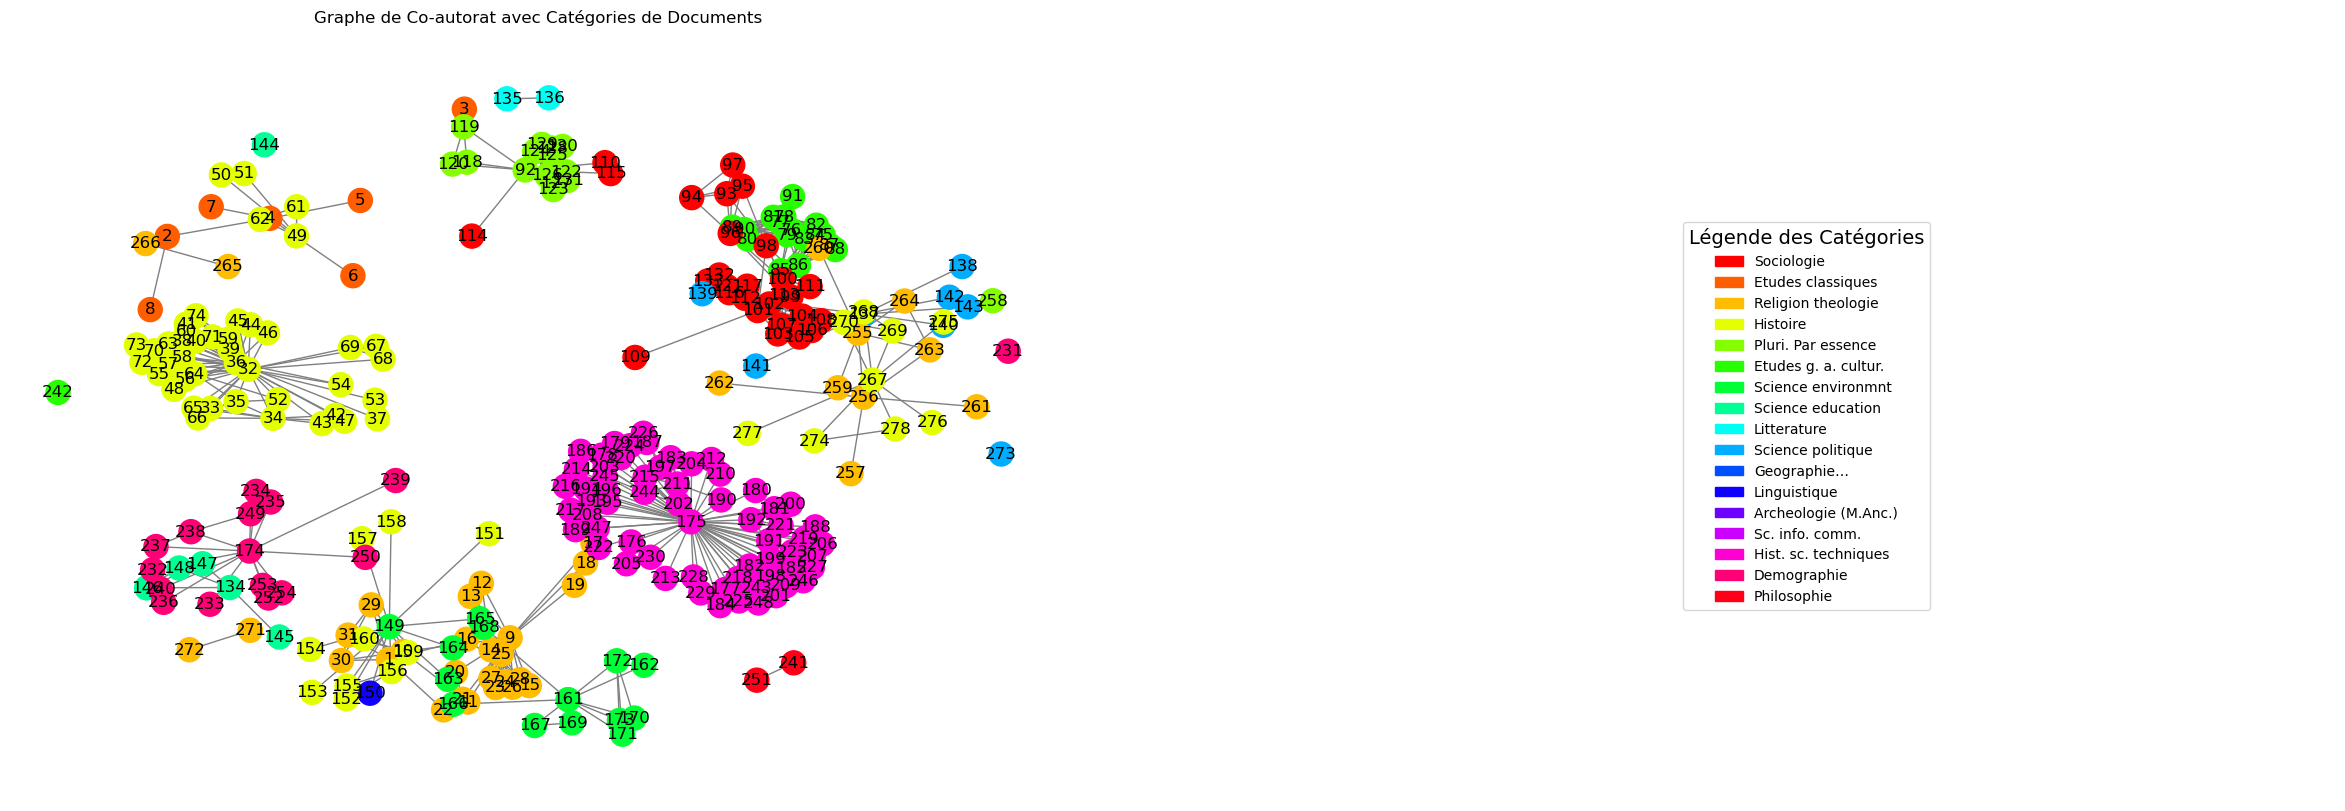

In [33]:
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

fig = plt.figure(figsize=(30, 10))
ax_graph = fig.add_subplot(121)
nx.draw(G, pos, ax=ax_graph, with_labels=True, node_size=300, font_size=12, edge_color='grey', node_color=node_colors)
ax_graph.set_title("Graphe de Co-autorat avec Catégories de Documents")

# Ajout d'un subplot pour la légende
ax_legend = fig.add_subplot(122)
ax_legend.axis('off')
legend_patches = [mpatches.Patch(color=color, label=category) for category, color in category_to_color.items()]
legend = ax_legend.legend(handles=legend_patches, loc='center', title="Légende des Catégories")
plt.setp(legend.get_title(), fontsize='14')

plt.show()


# classification

# classification des noeouds par caracteristiques textuelles

In [35]:
colonne_titres = [col for col in df.columns if "dcterms:title{Literal}" in col]

# Concaténer tous les titres et le résumé pour chaque document
# Utiliser .join() pour fusionner les titres, et ajouter le résumé à la fin
df['texte'] = df[colonne_titres].apply(lambda row: ' '.join(row.values.astype(str)), axis=1) + " " + df['dcterms:abstract{Literal}@fr'].fillna('')


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['texte'])

print(X_text.shape) 


(23823, 1000)


In [37]:
df['texte']

dcterms:identifier{Literal}
https://www.persee.fr/doc/ahess_0395-2649_1971_num_26_2_422360                   Les sociétés imaginées : monachisme et utopie ...
https://www.persee.fr/doc/ahess_0395-2649_1973_num_28_5_293413_t1_1157_0000_3    Jacques Maître, Sociologie religieuse et métho...
https://www.persee.fr/doc/ahess_0395-2649_1974_num_29_5_293553                                         Du cultuel au culturel nan 
https://www.persee.fr/doc/ahess_0395-2649_1995_num_50_4_279407                   Les prémices de la mécanisation agricole entre...
https://www.persee.fr/doc/antiq_0770-2817_1970_num_39_1_1587_t1_0320_0000_2      nan Gilbert Charles-Picard, L'archéologie, déc...
                                                                                                       ...                        
https://www.persee.fr/doc/syria_0039-7946_1970_num_47_1_8522                                                      Nécrologie. nan 
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_1

In [38]:
X_text

<23823x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 147384 stored elements in Compressed Sparse Row format>

In [39]:
df.shape

(23823, 20)

In [40]:
df

,persee:dateOfPrintPublication{Literal}(xsd:gYear),marcrel:aut{URIRef}[0],marcrel:aut{URIRef}[1],marcrel:aut{URIRef}[2],marcrel:aut{URIRef}[3],marcrel:aut{URIRef}[4],marcrel:aut{URIRef}[5],marcrel:aut{URIRef}[6],marcrel:aut{URIRef}[7],dcterms:title{Literal},bibo:numPages{Literal},dcterms:abstract{Literal}@fr,marcrel:aut{URIRef}[8],marcrel:aut{URIRef}[9],marcrel:aut{URIRef}[10],dcterms:title{Literal}[0],nombre_auteurs,code_categ,Nom_Complet_Categ,texte
dcterms:identifier{Literal},,,,,,,,,,,,,,,,,,,,
https://www.persee.fr/doc/ahess_0395-2649_1971_num_26_2_422360,1971,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Les sociétés imaginées : monachisme et utopie,27.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie,Les sociétés imaginées : monachisme et utopie ...
https://www.persee.fr/doc/ahess_0395-2649_1973_num_28_5_293413_t1_1157_0000_3,1973,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jacques Maître, Sociologie religieuse et métho...",2.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie,"Jacques Maître, Sociologie religieuse et métho..."
https://www.persee.fr/doc/ahess_0395-2649_1974_num_29_5_293553,1974,http://data.persee.fr/authority/58528#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Du cultuel au culturel,11.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie,Du cultuel au culturel nan
https://www.persee.fr/doc/ahess_0395-2649_1995_num_50_4_279407,1995,http://data.persee.fr/authority/247067#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Les prémices de la mécanisation agricole entre...,32.0,NaN,NaN,NaN,NaN,NaN,1,ahess,Sociologie,Les prémices de la mécanisation agricole entre...
https://www.persee.fr/doc/antiq_0770-2817_1970_num_39_1_1587_t1_0320_0000_2,1970,http://data.persee.fr/authority/246578#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,"Gilbert Charles-Picard, L'archéologie, découve...",1,antiq,Etudes classiques,"nan Gilbert Charles-Picard, L'archéologie, déc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.persee.fr/doc/syria_0039-7946_1970_num_47_1_8522,1970,http://data.persee.fr/authority/256018#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie.,8.0,NaN,NaN,NaN,NaN,NaN,2,syria,Histoire,Nécrologie. nan
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_1_8531,1972,http://data.persee.fr/authority/211732#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie,6.0,NaN,NaN,NaN,NaN,NaN,2,syria,Histoire,Nécrologie nan
https://www.persee.fr/doc/syria_0039-7946_1972_num_49_3_8534,1972,http://data.persee.fr/authority/237581#Person,http://data.persee.fr/authority/275874#Person,NaN,NaN,NaN,NaN,NaN,NaN,Nécrologie,4.0,NaN,NaN,NaN,NaN,NaN,2,syria,Histoire,Nécrologie nan


In [41]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'identifiant'}, inplace=True)

In [42]:
from sklearn.model_selection import train_test_split

y = df['Nom_Complet_Categ'].values  
X_train, X_test_text, y_train, y_test_text = train_test_split(X_text, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_text = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
model_text.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Prédiction sur l'ensemble de test
y_pred_text = model_text.predict(X_test_text)

# Évaluation de la performance du modèle
print(f"Accuracy: {accuracy_score(y_test_text, y_pred_text)}\n")
print(classification_report(y_test_text, y_pred_text))


Accuracy: 0.6690451206715635

                      precision    recall  f1-score   support

Archeologie (M.Anc.)       0.00      0.00      0.00         3
         Demographie       0.63      0.29      0.40       131
   Etudes classiques       0.73      0.56      0.64       326
Etudes g. a. cultur.       0.62      0.99      0.76      1080
Hist. sc. techniques       0.78      0.73      0.76       388
            Histoire       0.56      0.09      0.16       723
        Linguistique       0.00      0.00      0.00         1
         Litterature       0.45      0.24      0.31        42
         Philosophie       0.45      0.47      0.46       147
  Pluri. Par essence       0.69      0.28      0.39        40
  Religion theologie       0.61      0.82      0.70       807
   Science education       0.80      0.75      0.77       300
  Science environmnt       0.50      0.29      0.36        21
   Science politique       0.86      0.59      0.70       244
          Sociologie       0.82      0.

C:\Users\Lama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import networkx as nx
import pandas as pd

G = nx.Graph()

# Supposons que votre DataFrame s'appelle df
for index, row in df.iterrows():
    authors = [row[f'marcrel:aut{{URIRef}}[{i}]'] for i in range(len(aut)) if f'marcrel:aut{{URIRef}}[{i}]' in df.columns and pd.notnull(row[f'marcrel:aut{{URIRef}}[{i}]'])]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j], label=row['Nom_Complet_Categ'])


In [46]:
# Calculer des caractéristiques structurelles pour chaque nœud
degree_dict = dict(G.degree())
closeness_centrality_dict = nx.closeness_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(G)

features_df = pd.DataFrame({
    "Author": degree_dict.keys(),
    "Degree": degree_dict.values(),
    "Closeness": closeness_centrality_dict.values(),
    "Betweenness": betweenness_centrality_dict.values()
}).set_index('Author')


In [47]:
author_category = pd.melt(df, id_vars=['Nom_Complet_Categ'], value_vars=[f'marcrel:aut{{URIRef}}[{i}]' for i in range(len(aut)) if f'marcrel:aut{{URIRef}}[{i}]' in df.columns], value_name='Author').dropna().drop(columns=['variable'])

author_category = author_category.groupby('Author')['Nom_Complet_Categ'].first().reset_index()

# Joindre les labels aux caractéristiques
features_df = features_df.join(author_category.set_index('Author'), on='Author')


In [48]:
X = features_df[['Degree', 'Closeness', 'Betweenness']]
y = features_df['Nom_Complet_Categ']

# Division en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test_struct, y_train, y_test_struct = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_struct = RandomForestClassifier(random_state=42)
model_struct.fit(X_train, y_train)


# Évaluation de la performance du modèle
print(f"Accuracy: {accuracy_score(y_test_struct, y_pred_struct)}\n")
print(classification_report(y_test_struct, y_pred_struct))



Accuracy: 0.8363636363636363

                      precision    recall  f1-score   support

         Demographie       1.00      0.67      0.80         3
Etudes g. a. cultur.       1.00      0.67      0.80         3
Hist. sc. techniques       0.92      1.00      0.96        12
            Histoire       0.90      0.82      0.86        11
         Litterature       0.00      0.00      0.00         1
  Pluri. Par essence       1.00      1.00      1.00         5
  Religion theologie       1.00      0.67      0.80         9
   Science education       1.00      1.00      1.00         1
  Science environmnt       1.00      0.50      0.67         2
   Science politique       0.33      1.00      0.50         1
          Sociologie       0.58      1.00      0.74         7

            accuracy                           0.84        55
           macro avg       0.79      0.76      0.74        55
        weighted avg       0.88      0.84      0.84        55



C:\Users\Lama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


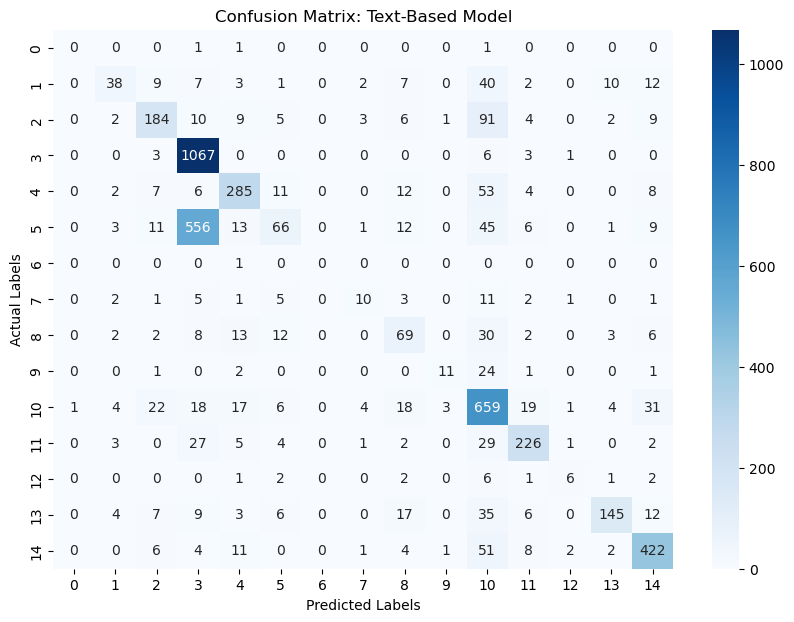

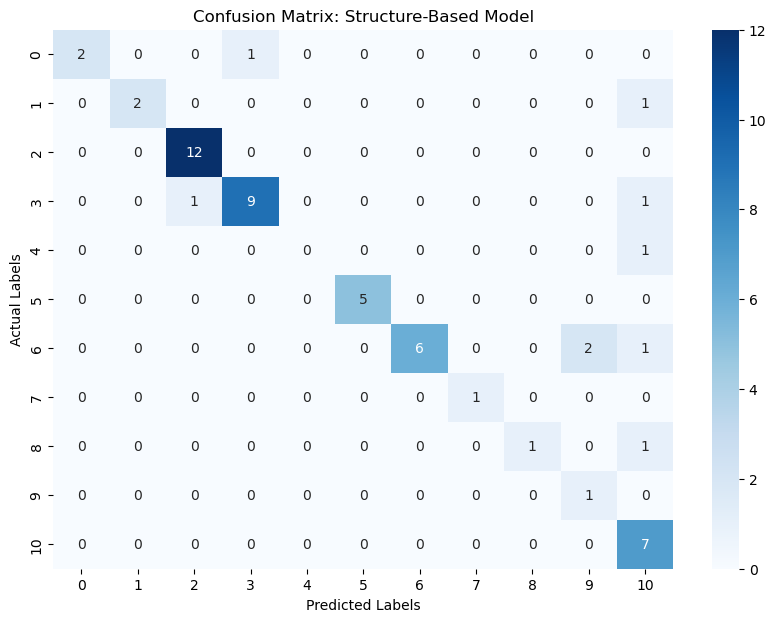

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions
y_pred_text = model_text.predict(X_test_text)
y_pred_struct = model_struct.predict(X_test_struct)

# Matrices de confusion
cm_text = confusion_matrix(y_test_text, y_pred_text)
cm_struct = confusion_matrix(y_test_struct, y_pred_struct)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

plot_confusion_matrix(cm_text, title='Confusion Matrix: Text-Based Model')
plot_confusion_matrix(cm_struct, title='Confusion Matrix: Structure-Based Model')
